In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal as ps
import seaborn as sns
import statsmodels.api as sm
import matplotlib.cm as cm
import matplotlib.colors as colors
import networkx as nx
import osmnx as ox
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
np.random.seed(0)
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__


/opt/conda/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


'0.9'

In [2]:
pnq_census = gpd.read_file("data/PCA_complete/PCA_complete.shp")
pnq_census = gpd.GeoDataFrame(pnq_census)

In [3]:
infra = pd.read_csv("data/osm_infra.csv")

In [4]:
pnq_census = pnq_census.join(infra, how='outer')

In [5]:
pnq_census.head()

,Ward,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,P_SC,M_SC,...,n,node_density_km,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion
0,1,10452,44060,23099,20961,5686,2993,2693,8216,4202,...,18,244.609573,0.000000,18543.729415,68.228550,1364.571,20,3.222222,"{0: 0, 1: 0, 2: 0, 3: 14, 4: 4}","{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.7777777777777778..."
1,2,5933,25430,13125,12305,3054,1591,1463,3887,1985,...,37,244.001397,0.000000,22345.509438,77.009977,3388.439,44,2.810811,"{0: 0, 1: 5, 2: 0, 3: 30, 4: 1, 5: 1}","{0: 0.0, 1: 0.13513513513513514, 2: 0.0, 3: 0...."
2,3,5487,22592,11528,11064,2487,1347,1140,4846,2444,...,90,277.752157,0.000000,24143.868550,75.224375,7823.335,104,2.533333,"{0: 0, 1: 27, 2: 0, 3: 52, 4: 10, 5: 1}","{0: 0.0, 1: 0.3, 2: 0.0, 3: 0.5777777777777777..."
3,4,5906,24678,12830,11848,2586,1367,1219,3478,1744,...,67,166.015927,0.012195,19719.902067,95.885229,7958.474,83,2.686567,"{0: 0, 1: 14, 2: 0, 3: 46, 4: 7}","{0: 0.0, 1: 0.208955223880597, 2: 0.0, 3: 0.68..."
4,5,4242,18490,9378,9112,1972,1023,949,5611,2801,...,70,229.817984,0.000000,20109.848435,67.310286,6125.236,91,2.828571,"{0: 0, 1: 11, 2: 0, 3: 49, 4: 10}","{0: 0.0, 1: 0.15714285714285714, 2: 0.0, 3: 0...."


In [6]:
list(pnq_census)

['Ward',
 'No_HH',
 'TOT_P',
 'TOT_M',
 'TOT_F',
 'P_06',
 'M_06',
 'F_06',
 'P_SC',
 'M_SC',
 'F_SC',
 'P_ST',
 'M_ST',
 'F_ST',
 'P_LIT',
 'M_LIT',
 'F_LIT',
 'P_ILL',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_P',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_P',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_P',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_P',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_P',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_P',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_P',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_P',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_P',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_P',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_P',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3',
 'MARGWORK_1',
 'MARGWORK_2',
 'MARG_CL_3_',
 'MARG_CL__1',
 'MARG_CL__2',
 'MARG_AL_3_',
 'MARG_AL__1',
 'MARG_AL__2',
 'MARG_HH_3_',
 'MARG_HH__1',
 'MARG_HH__2',
 'MARG_OT_3_',
 'MARG_OT__1',
 'MARG_OT__2',
 'MARGWORK_0',
 'MARGWORK_4',
 'MARGWORK_5',
 'MARG_CL_0_',
 'MARG_CL__3',
 'MARG_CL__4',
 'MARG_AL_0_',
 'MARG_AL

In [7]:
pnq_census['str_per_P'] = pnq_census['street_length_total'] / pnq_census['TOT_P']

In [8]:
pnq_census['P_per_str'] = pnq_census['TOT_P'] / pnq_census['street_length_total']

We normalize the population per kilometer street length between 0 and 1.

In [9]:
pnq_census['str_dens_norml'] = (pnq_census['P_per_str'] - pnq_census['P_per_str'].min()) / (pnq_census['P_per_str'].max() - pnq_census['P_per_str'].min())

In [10]:
pnq_census['int_per_P'] = pnq_census['n'] / pnq_census['TOT_P']

In [11]:
pnq_census['P_per_int'] = pnq_census['TOT_P'] / pnq_census['n']

Text(0.5, 1.0, 'Population per Kilometer of Street Length')

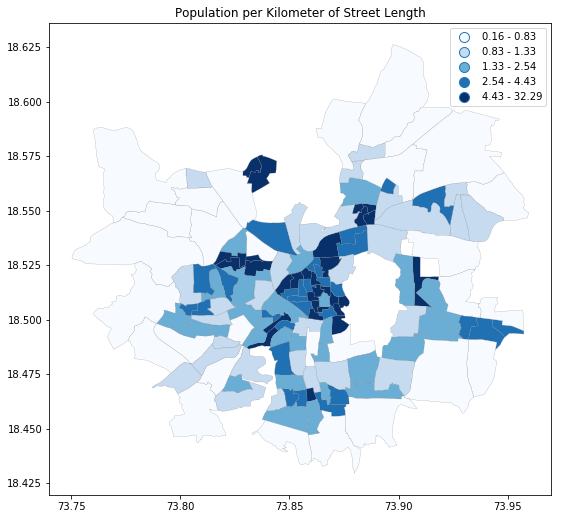

In [12]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = pnq_census.plot(ax=ax, 
                     column='P_per_str', 
                     cmap='Blues', 
                     edgecolor='grey', 
                     lw=0.2, 
                 scheme = 'Quantiles',
                     k = 5,
                    legend = True,)
ax.set_title('Population per Kilometer of Street Length')

In [13]:
pnq_census['area_sqkm'] = pnq_census['area']/1e+6

In [14]:
pnq_census['pop_dens'] = pnq_census['TOT_P'] /( pnq_census['area_sqkm'])

In [15]:
pnq_census['pop_dens_norml'] = (pnq_census['pop_dens'] - pnq_census['pop_dens'].min()) / (pnq_census['pop_dens'].max() - pnq_census['pop_dens'].min())

Text(0.5, 1.0, 'Population Density - Persons per sqkm')

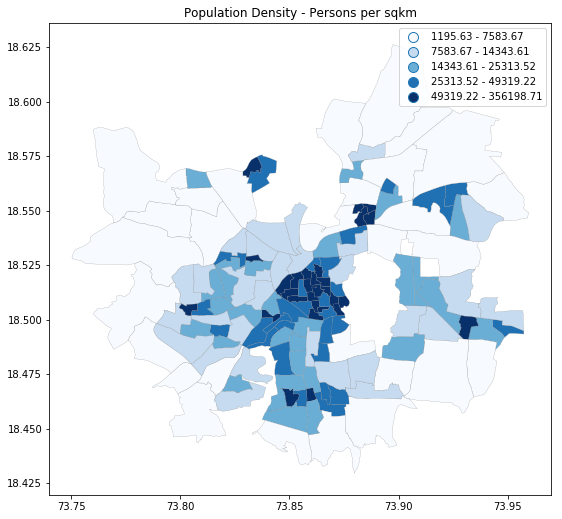

In [16]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = pnq_census.plot(ax=ax, 
                     column='pop_dens', 
                     cmap='Blues', 
                     edgecolor='grey', 
                     lw=0.2, 
                 scheme = 'Quantiles',
                     k = 5,
                    legend = True,)
ax.set_title('Population Density - Persons per sqkm')

We see that the the population per kilometer of street, as well as the population per square kilometer of area closely correspond.

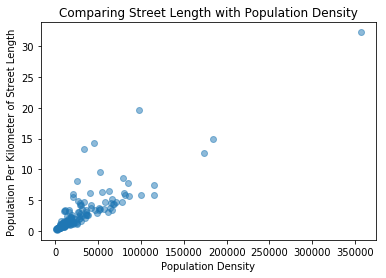

In [17]:
plt.scatter(y = pnq_census['P_per_str'],
            x = pnq_census['pop_dens'],
            alpha=0.5)
plt.title('Comparing Street Length with Population Density')
plt.xlabel('Population Density')
plt.ylabel('Population Per Kilometer of Street Length')
plt.show()

Text(0.5, 1.0, 'Streets Per Intersection (Average)')

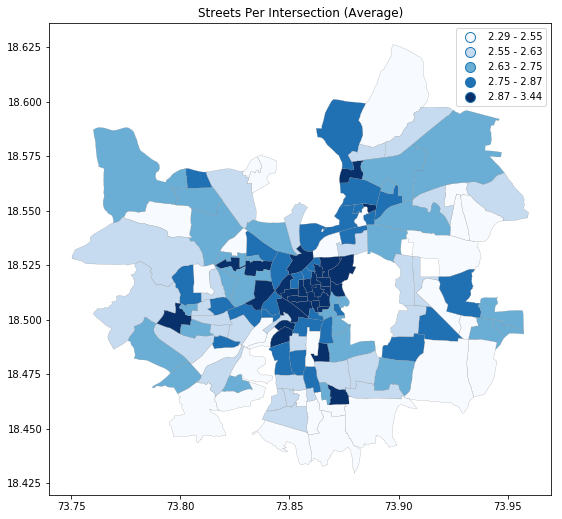

In [18]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = pnq_census.plot(ax=ax, 
                     column='streets_per_node_avg', 
                     cmap='Blues', 
                     edgecolor='grey', 
                     lw=0.2, 
                 scheme = 'Quantiles',
                     k = 5,
                    legend = True,)
ax.set_title('Streets Per Intersection (Average)')

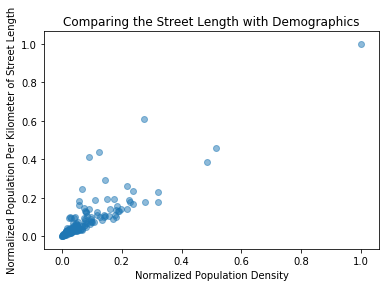

In [19]:
plt.scatter(y = pnq_census['str_dens_norml'],
            x = pnq_census['pop_dens_norml'],
            alpha=0.5)
plt.title('Comparing the Street Length with Demographics')
plt.xlabel('Normalized Population Density')
plt.ylabel('Normalized Population Per Kilometer of Street Length')
plt.show()

We subtract the normalized population density from the normalized population per kilometer of street length. Thus we will get three possible values:

1. = 0 - The ratios match
1. < 0 - Population density is lower than street network density
1. \> 0 - Population density is higher than street network density

In [20]:
pnq_census['dens_ratio'] = pnq_census['pop_dens_norml'] - pnq_census['str_dens_norml']

Text(0.5, 1.0, 'Density Ratio')

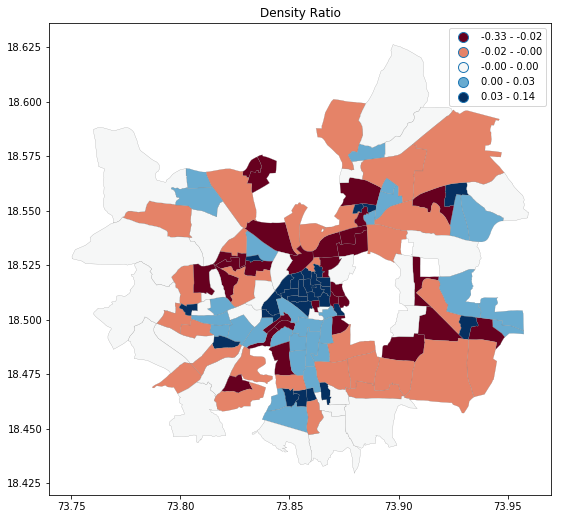

In [21]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = pnq_census.plot(ax=ax, 
                     column='dens_ratio', 
                     cmap='RdBu', 
                     edgecolor='grey', 
                     lw=0.2, 
                 scheme = 'Quantiles',
                     k = 5,
                    legend = True,)
ax.set_title('Density Ratio')

In [22]:
gpd.GeoDataFrame.to_file(pnq_census, 'data/PCA_complete')